# 8 - A

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
x = np.arange(-2, 3, 0.00625)
y=norm.pdf(x,0.5,0.1)

In [ ]:
data=np.random.normal(0.5,0.1,800)

In [ ]:
def normal_kernel(x,data,h):
  n=len(data)
  u=[]
  for i in range(n):
    u.append((x-data[i])/h)
  k=norm.pdf(u)
  f=np.sum(k)/(n*h)
  return f

In [ ]:
def kde_estimate(x_list,data,h,kernel):
  arr=[]
  for i in x_list :
    arr.append(kernel(i,data,h))
  arr=np.array(arr)
  return arr

In [ ]:
x = np.arange(-2, 3, 0.00625)
y=norm.pdf(x,0.5,0.1)
f=kde_estimate(x,data,0.1,normal_kernel)

Text(0.5, 1.0, 'Normal Kernel')

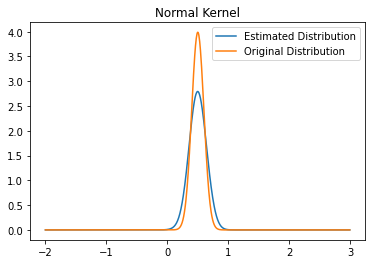

In [ ]:
plt.plot(x,f,label="Estimated Distribution")
plt.plot(x,y,label="Original Distribution")
plt.legend()
plt.title("Normal Kernel")

In [ ]:
def mean(a,b):
  n=len(a)
  s=0
  for i in range(n):
    s+=(a[i]*b[i])
  return s

In [ ]:
def sd(a,b):
  n=len(a)
  s_1,s_2=0,0
  for i in range(n):
    s_1+=(a[i]*b[i])
    s_2+=(a[i]*a[i]*b[i])
  s_2/=100
  s_1/=100
  return np.sqrt(abs(s_2-(s_1*s_1)))

# 8 - B

In [ ]:
import math

In [ ]:
x_list = np.arange(0,1.01,0.01)
data=data=np.random.normal(0.5,0.1,800)
y=norm.pdf(x_list,0.5,0.1)

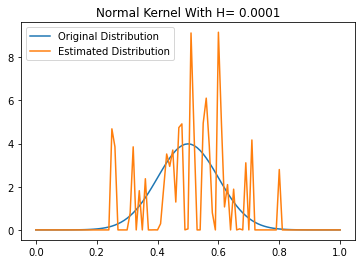

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.506390875107092 Standard Deviation = 0.13514789983589162
The mean of original distribution is 1.28 percent lesser than the mean of estimated distribution
The standard deviation of original distribution is 35.15 percent lesser than the standard deviation of estimated distribution




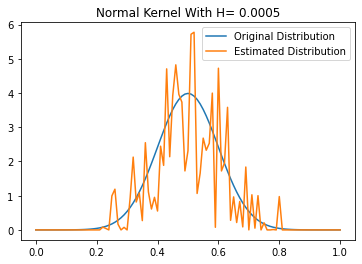

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.45521027137371406 Standard Deviation = 0.17881593511375593
The mean of original distribution is 8.96 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 78.82 percent lesser than the standard deviation of estimated distribution




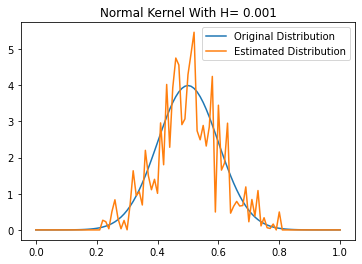

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.48016630633052676 Standard Deviation = 0.1441069166160601
The mean of original distribution is 3.97 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 44.11 percent lesser than the standard deviation of estimated distribution




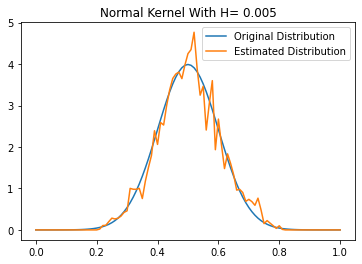

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.5041887918486987 Standard Deviation = 0.10237244685580144
The mean of original distribution is 0.84 percent lesser than the mean of estimated distribution
The standard deviation of original distribution is 2.37 percent lesser than the standard deviation of estimated distribution




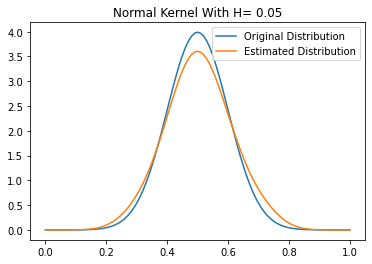

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.5041941004653993 Standard Deviation = 0.11375874661405784
The mean of original distribution is 0.84 percent lesser than the mean of estimated distribution
The standard deviation of original distribution is 13.76 percent lesser than the standard deviation of estimated distribution




In [ ]:
h_values=[0.0001, 0.0005, 0.001, 0.005, 0.05]
for h in h_values: 
  plt.plot(x_list,y,label="Original Distribution")
  f=kde_estimate(x_list,data,h,normal_kernel)
  plt.plot(x_list,f,label="Estimated Distribution")
  plt.legend()
  plt.title("Normal Kernel With H= "+str(h))
  plt.show()
  mean_original,sd_original=mean(x_list,y)/100,sd(x_list,y)
  mean_est,sd_est=mean(x_list,f)/100,sd(x_list,f)
  print("For Original Distribution "+ "Mean = "+str(mean_original)+" Standard Deviation = "+str(sd_original))
  print("For Estimated Distribution "+ "Mean = "+str(mean_est)+" Standard Deviation = "+str(sd_est))
  if mean_original>mean_est:
    difference="greater"
  elif mean_original<mean_est:
    difference="lesser"
  mean_diff=abs(mean_original-mean_est)
  perc=(mean_diff*100/mean_original)
  if perc<0.001:
    print("The mean of the original distribution is equal to the mean of the estimated distribution")
  else:
    print("The mean of original distribution is",str(round(perc,2)),"percent",difference,"than the mean of estimated distribution")
  if sd_original>sd_est:
    difference="greater"
  elif sd_original<sd_est:
    difference="lesser"
  sd_diff=abs(sd_original-sd_est)
  perc=(sd_diff*100/sd_original)
  if perc<0.001:
    print("The standard deviation of the original distribution is equal to the standard deviation of the estimated distribution")
  else:
    print("The standard deviation of original distribution is",str(round(perc,2)),"percent",difference,"than the standard deviation of estimated distribution")
  
  print()
  print()


H  | Percentage Deviation in Mean | Percentage Deviation in Standard Deviation 
-------------------|--------------------|-------------------|
0.0001       |    27.26|156.32
0.0005       |    6.03|57.93
0.001        |    3.31 | 28.12
0.005        |    0.73|3.66
0.05         |    0.69| 8.78


### Based on the observation of above plots the H value of 0.05 looks like performing best.
### And the deviations from original mean and variance are least for the H value of 0.005

# 8 - C

In [ ]:
def uniform_kernel(x,data,h):
  k=[]
  u=[]
  n=len(data)
  for i in range(n):
    u.append((x-data[i])/h)
  for i in range(n):
    if abs(u[i])<=1:
      k.append(1/2)
    else:
      k.append(0)
  f=np.sum(k)/(n*h)
  return f
    


In [ ]:
def triangular_kde(x,data,h):
  n=len(data)
  u,k=[],[]
  for i in range(n):
    u.append((x-data[i])/h)
  for i in range(n):
    if abs(u[i])<=1:
      k.append(1-abs(u[i]))
    else:
      k.append(0)
  f=np.sum(k)/(n*h)
  return f


In [ ]:
def plot_distributions(x_list,y,h_values,kernel,data,kernel_name):
  for h in h_values: 
    plt.plot(x_list,y,label="Original Distribution")
    f=kde_estimate(x_list,data,h,kernel)
    plt.plot(x_list,f,label="Estimated Distribution")
    plt.legend()
    plt.title(kernel_name+" with H = "+str(h))
    plt.show()
    mean_original,sd_original=mean(x_list,y)/100,sd(x_list,y)
    mean_est,sd_est=mean(x_list,f)/100, sd(x_list,f)
    print("For Original Distribution "+ "Mean = "+str(mean_original)+" Standard Deviation = "+str(sd_original))
    print("For Estimated Distribution "+ "Mean = "+str(mean_est)+" Standard Deviation = "+str(sd_est))
    if mean_original>mean_est:
      difference="greater"
    elif mean_original<mean_est:
      difference="lesser"
    mean_diff=abs(mean_original-mean_est)
    perc=(mean_diff*100/mean_original)
    if perc<0.001:
      print("The mean of the original distribution is equal to the mean of the estimated distribution")
    else:
      print("The mean of original distribution is",str(round(perc,2)),"percent",difference,"than the mean of estimated distribution")
    if sd_original>sd_est:
      difference="greater"
    elif sd_original<sd_est:
      difference="lesser"
    sd_diff=abs(sd_original-sd_est)
    perc=(sd_diff*100/sd_original)
    if perc<0.007:
      print("The standard deviation of the original distribution is equal to the standard deviation of the estimated distribution")
    else:
      print("The standard deviation of original distribution is",str(round(perc,2)),"percent",difference,"than the standard deviation of estimated distribution")
  
    print()
    print()


In [ ]:
x_list = np.arange(0,1.01,0.01)
data=data=np.random.normal(0.5,0.1,800)
y=norm.pdf(x_list,0.5,0.1)
h_values=[0.0001, 0.0005, 0.001, 0.005, 0.05]

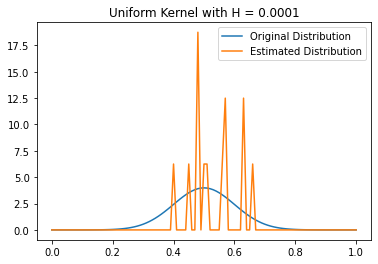

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4325 Standard Deviation = 0.21847482692520895
The mean of original distribution is 13.5 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 118.47 percent lesser than the standard deviation of estimated distribution




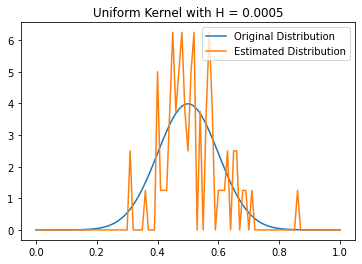

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4590000000000001 Standard Deviation = 0.1861155555024884
The mean of original distribution is 8.2 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 86.12 percent lesser than the standard deviation of estimated distribution




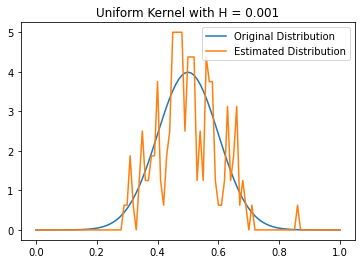

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.46668750000000003 Standard Deviation = 0.15901541542803327
The mean of original distribution is 6.66 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 59.02 percent lesser than the standard deviation of estimated distribution




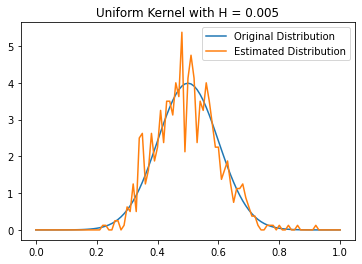

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.49718749999999984 Standard Deviation = 0.10051474938410829
The mean of original distribution is 0.56 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 0.51 percent lesser than the standard deviation of estimated distribution




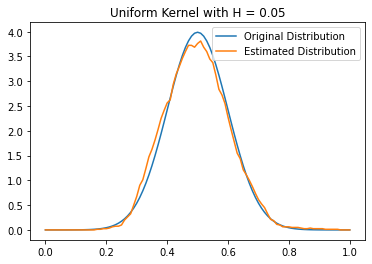

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.49711250000000035 Standard Deviation = 0.10441581462474743
The mean of original distribution is 0.58 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 4.42 percent lesser than the standard deviation of estimated distribution




In [ ]:
plot_distributions(x_list,y,h_values,uniform_kernel,data,"Uniform Kernel")


H  | Percentage Deviation in Mean | Percentage Deviation in Standard Deviation 
-------------------|--------------------|-------------------|
0.0001       |    13.5|118.47
0.0005       |    8.2|86.12
0.001        |    6.66 | 59.02
0.005        |    0.56|0.51
0.05         |    0.58| 4.42


### Based on the observation of above plots the H value of 0.05 looks like performing the best.
### And the deviations from original mean and variance are least for the H value of 0.005

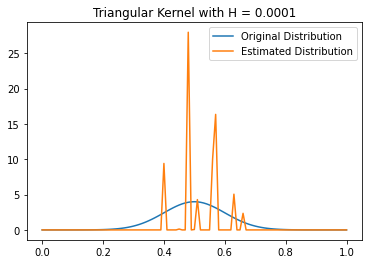

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.39118009509918783 Standard Deviation = 0.22983014624892953
The mean of original distribution is 21.76 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 129.83 percent lesser than the standard deviation of estimated distribution




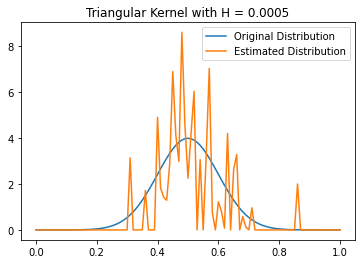

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4451453654582157 Standard Deviation = 0.19679724560191428
The mean of original distribution is 10.97 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 96.8 percent lesser than the standard deviation of estimated distribution




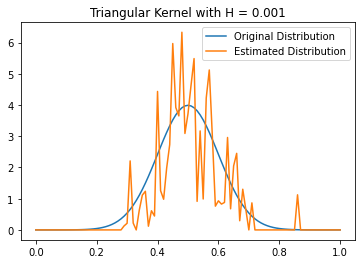

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.45133959579516647 Standard Deviation = 0.18747773437990636
The mean of original distribution is 9.73 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 87.48 percent lesser than the standard deviation of estimated distribution




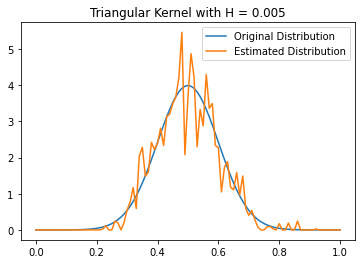

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.49585523888407823 Standard Deviation = 0.10675493091137168
The mean of original distribution is 0.83 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 6.75 percent lesser than the standard deviation of estimated distribution




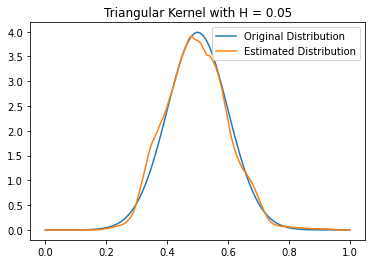

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4972073793000693 Standard Deviation = 0.10246496679673502
The mean of original distribution is 0.56 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 2.47 percent lesser than the standard deviation of estimated distribution




In [ ]:
plot_distributions(x_list,y,h_values,triangular_kde,data,"Triangular Kernel")


H  | Percentage Deviation in Mean | Percentage Deviation in Standard Deviation 
-------------------|--------------------|-------------------|
0.0001       |    21.76|129.83
0.0005       |    10.97|96.8
0.001        |    9.73 | 87.48
0.005        |    0.83|6.75
0.05         |    0.56| 2.47


### Based on the observation of above plots the H value of 0.05 looks like performing the best.
### And the deviations from original mean and variance are least for the H value of 0.05

# 8 - D

In [ ]:
data=pd.read_csv("/content/a3_q8.csv",header=None)

In [ ]:
data.head()

,0
0,0.141873
1,0.050874
2,0.696267
3,0.111221
4,0.657173


In [ ]:
data=data.iloc[:][0]
data=[data[i] for i inrange(len(data))]

In [ ]:
x = np.arange(-2, 3, 0.00625)
y=norm.pdf(x,0.5,0.1)
f=kde_estimate(x,data,0.5,normal_kernel)

Text(0.5, 1.0, 'Normal Kernel')

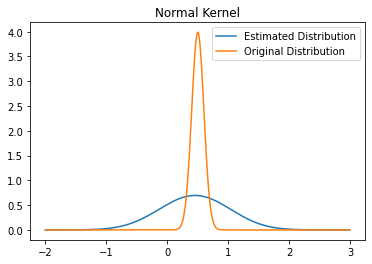

In [ ]:
plt.plot(x,f,label="Estimated Distribution")
plt.plot(x,y,label="Original Distribution")
plt.legend()
plt.title("Normal Kernel")

In [ ]:
x_list = np.arange(0,1.01,0.01)
y=norm.pdf(x_list,0.5,0.1)
h_values=[0.0001, 0.0005, 0.001, 0.005, 0.05]

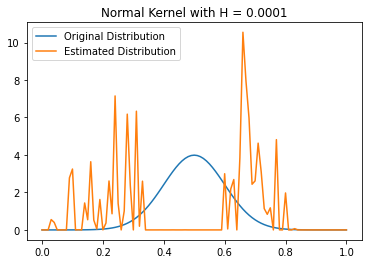

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.5080970912058647 Standard Deviation = 0.21536076144782934
The mean of original distribution is 1.62 percent lesser than the mean of estimated distribution
The standard deviation of original distribution is 115.36 percent lesser than the standard deviation of estimated distribution




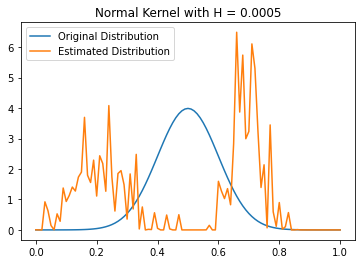

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.48697731318403975 Standard Deviation = 0.23839712135235744
The mean of original distribution is 2.6 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 138.4 percent lesser than the standard deviation of estimated distribution




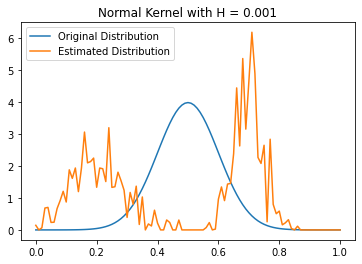

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4679898661169175 Standard Deviation = 0.2535151888562762
The mean of original distribution is 6.4 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 153.52 percent lesser than the standard deviation of estimated distribution




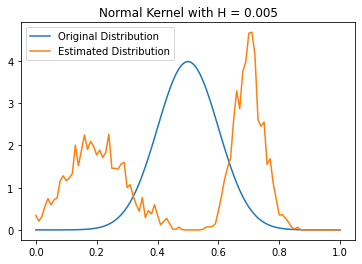

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4482347692271753 Standard Deviation = 0.2638636347882409
The mean of original distribution is 10.35 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 163.86 percent lesser than the standard deviation of estimated distribution




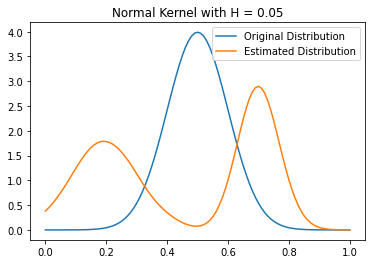

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4485429342716778 Standard Deviation = 0.26778918892667736
The mean of original distribution is 10.29 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 167.79 percent lesser than the standard deviation of estimated distribution




In [ ]:
plot_distributions(x_list,y,h_values,normal_kernel,data,"Normal Kernel")


H  | Percentage Deviation in Mean | Percentage Deviation in Standard Deviation 
-------------------|--------------------|-------------------|
0.0001       |    1.62|115.36
0.0005       |    2.6|138.4
0.001        |    6.4 |153.52
0.005        |    10.35|163.86
0.05         |    10.29| 167.79


### Based on the observation of above plots and the values in the above table the H value of 0.0001 looks like performing the best.

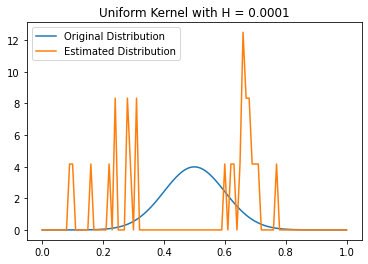

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.52375 Standard Deviation = 0.1840700161170562
The mean of original distribution is 4.75 percent lesser than the mean of estimated distribution
The standard deviation of original distribution is 84.07 percent lesser than the standard deviation of estimated distribution




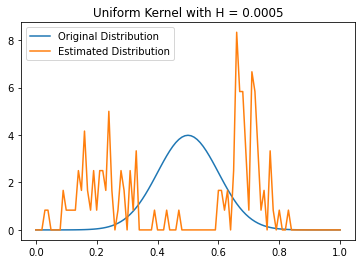

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.49908333333333355 Standard Deviation = 0.22695078700507318
The mean of original distribution is 0.18 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 126.95 percent lesser than the standard deviation of estimated distribution




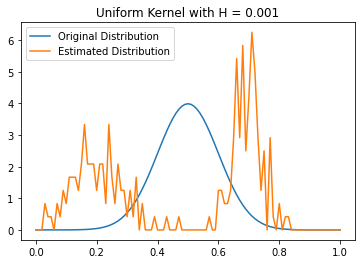

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4568333333333334 Standard Deviation = 0.26106507277347957
The mean of original distribution is 8.63 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 161.07 percent lesser than the standard deviation of estimated distribution




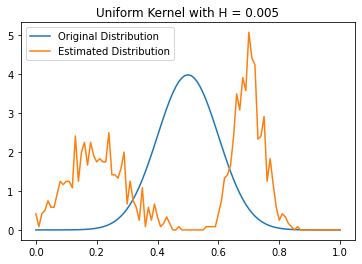

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.44812500000000005 Standard Deviation = 0.2638090869833713
The mean of original distribution is 10.37 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 163.81 percent lesser than the standard deviation of estimated distribution




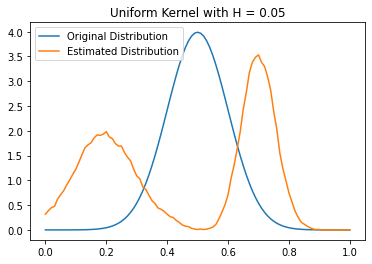

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.44824500000000006 Standard Deviation = 0.26526691584452555
The mean of original distribution is 10.35 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 165.27 percent lesser than the standard deviation of estimated distribution




In [ ]:
plot_distributions(x_list,y,h_values,uniform_kernel,data,"Uniform Kernel")


H  | Percentage Deviation in Mean | Percentage Deviation in Standard Deviation 
-------------------|--------------------|-------------------|
0.0001       |    4.75|84.07
0.0005       |    0.18|126.95
0.001        |    8.63 |161.07
0.005        |    10.37|163.81
0.05         |    10.35| 165.27


### Based on the observation of above plots and the values in the above table the H value of 0.001 looks like performing the best.

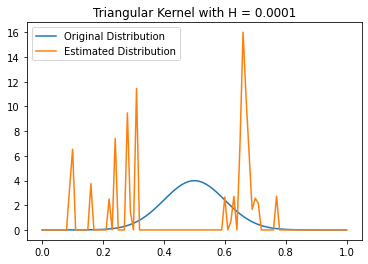

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4723761597035165 Standard Deviation = 0.22337543709654156
The mean of original distribution is 5.52 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 123.38 percent lesser than the standard deviation of estimated distribution




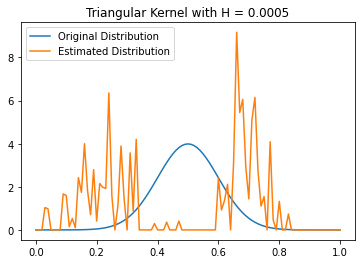

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.5136074904983706 Standard Deviation = 0.20989575977926755
The mean of original distribution is 2.72 percent lesser than the mean of estimated distribution
The standard deviation of original distribution is 109.9 percent lesser than the standard deviation of estimated distribution




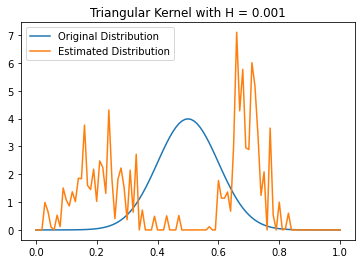

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4912300043334525 Standard Deviation = 0.23440230441775936
The mean of original distribution is 1.75 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 134.4 percent lesser than the standard deviation of estimated distribution




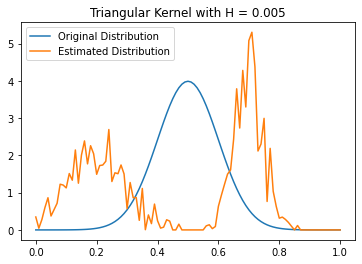

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4540199733545321 Standard Deviation = 0.2611668736973374
The mean of original distribution is 9.2 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 161.17 percent lesser than the standard deviation of estimated distribution




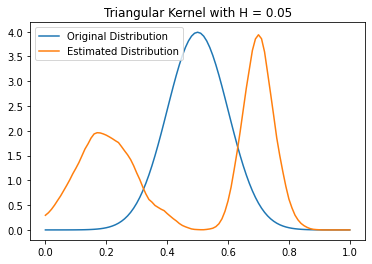

For Original Distribution Mean = 0.4999997815123576 Standard Deviation = 0.09999994582855165
For Estimated Distribution Mean = 0.4481913939074269 Standard Deviation = 0.26454555398348106
The mean of original distribution is 10.36 percent greater than the mean of estimated distribution
The standard deviation of original distribution is 164.55 percent lesser than the standard deviation of estimated distribution




In [ ]:
plot_distributions(x_list,y,h_values,triangular_kde,data,"Triangular Kernel")


H  | Percentage Deviation in Mean | Percentage Deviation in Standard Deviation 
-------------------|--------------------|-------------------|
0.0001       |    5.52|123.38
0.0005       |    2.72|109.9
0.001        |    1.75 |134.4
0.005        |    9.2|161.17
0.05         |    10.36| 164.55


### Based on the observation of above plots and the values in the above table the H value of 0.001 looks like performing the best.